# Split data 7-3

In [2]:
import pandas as pd

# Load data from CSV file
data = pd.read_csv('../ELC.csv')
data

,time,open,high,low,close,volume
0,2019-03-01,4347.826172,4527.950195,4347.826172,4409.937988,7790.0
1,2019-03-04,4409.937988,4527.950195,4322.981445,4347.826172,25064.0
2,2019-03-05,4409.937988,4409.937988,4335.403809,4347.826172,58956.0
3,2019-03-06,4347.826172,4372.670898,4347.826172,4347.826172,8434.0
4,2019-03-07,4366.459473,4440.993652,4335.403809,4335.403809,82027.0
...,...,...,...,...,...,...
1316,2024-06-10,27750.000000,27750.000000,27100.000000,27200.000000,1661200.0
1317,2024-06-11,27250.000000,28350.000000,27250.000000,28350.000000,2570200.0
1318,2024-06-12,28350.000000,28750.000000,27850.000000,28200.000000,1509300.0
1319,2024-06-13,28400.000000,29000.000000,27900.000000,28700.000000,3856900.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [4]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [5]:
# 2. Đọc file dữ liệu chứng khoán FPT và chia train test validate theo tỉ lệ 7:3
df = data
df['time'] = pd.to_datetime(df['time'])
df = df[['close', 'time']]
df = df.dropna() # Drop missing values
df.set_index('time', inplace=True)
#df = df.reset_index(drop=True) # Reset the index

# Split the data into training and testing sets
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [6]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.1 MB/s eta 0:00:00


In [7]:
df

,close
time,
2019-03-01,4409.937988
2019-03-04,4347.826172
2019-03-05,4347.826172
2019-03-06,4347.826172
2019-03-07,4335.403809
...,...
2024-06-10,27200.000000
2024-06-11,28350.000000
2024-06-12,28200.000000


In [8]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12923.378, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12997.261, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12940.215, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12925.481, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12995.285, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12925.660, Time=0.78 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12923.665, Time=0.72 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=12910.238, Time=3.62 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=12925.622, Time=1.04 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=12909.594, Time=6.92 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=12926.136, Time=2.42 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=12920.177, Time=4.47 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=12908.717, Time=6.47 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=12910.438, Time=3.74 sec
 ARIMA(5,1,3)(0,0,0

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [9]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(n_periods=len(y_test))

In [10]:
import datetime

In [11]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]
next_30_days = [last_index + datetime.timedelta(days=i+1) for i in range(30)]
x_next_30_days =  np.array(next_30_days).reshape(-1, 1)
last_data = pd.Index(next_30_days)

# Predict the closing prices for the next 30 days

y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[5701.43242911 5722.09622311 5737.59405558 5693.51030814 5682.53095375
 5706.11390389 5734.12418032 5713.04930651 5686.31797098 5693.07302662
 5723.47307691 5724.14261997 5697.98160687 5687.70225017 5709.94503134
 5725.65018787 5710.4881274  5690.64030765 5698.89983285 5719.69674167
 5718.72501004 5698.90171177 5693.71386695 5710.45863747 5720.6006825
 5708.13587797 5694.82596147 5702.23444331 5716.96978492 5714.6708595 ]


In [12]:
# 7. Đánh giá độ chính xác validate, test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)


Testing RMSE: 11272.89972553789


Testing RMSE: 11272.89972553789


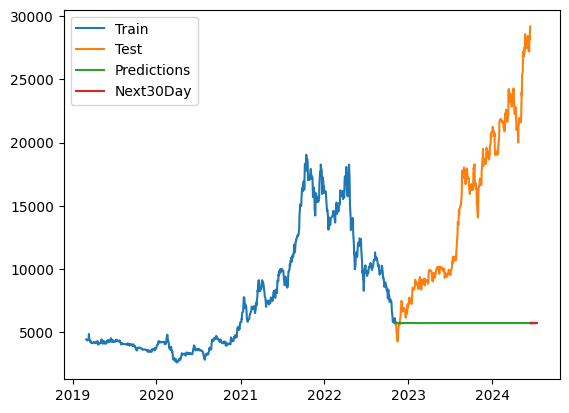

In [13]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [14]:
test_data.index

DatetimeIndex(['2022-11-08', '2022-11-09', '2022-11-10', '2022-11-11',
               '2022-11-14', '2022-11-15', '2022-11-16', '2022-11-17',
               '2022-11-18', '2022-11-21',
               ...
               '2024-06-03', '2024-06-04', '2024-06-05', '2024-06-06',
               '2024-06-07', '2024-06-10', '2024-06-11', '2024-06-12',
               '2024-06-13', '2024-06-14'],
              dtype='datetime64[ns]', name='time', length=397, freq=None)

In [15]:
# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Tính toán RMSE, MAPE và MDA
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mda = calculate_mda(y_test, y_pred)

# Tính MSLE
test_msle = np.mean((np.log1p(y_pred) - np.log1p(y_test)) ** 2)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MDA:', test_mda)
print('Testing MSLE:', test_msle)

Testing RMSE: 11272.89972553789
Testing MAPE: 53.68267949744225
Testing MDA: 43.93939393939394
Testing MSLE: 0.9554676052444595


# Split data 8:2

In [16]:
import pandas as pd

# Load data from CSV file
data = pd.read_csv('../ELC.csv')
data

,time,open,high,low,close,volume
0,2019-03-01,4347.826172,4527.950195,4347.826172,4409.937988,7790.0
1,2019-03-04,4409.937988,4527.950195,4322.981445,4347.826172,25064.0
2,2019-03-05,4409.937988,4409.937988,4335.403809,4347.826172,58956.0
3,2019-03-06,4347.826172,4372.670898,4347.826172,4347.826172,8434.0
4,2019-03-07,4366.459473,4440.993652,4335.403809,4335.403809,82027.0
...,...,...,...,...,...,...
1316,2024-06-10,27750.000000,27750.000000,27100.000000,27200.000000,1661200.0
1317,2024-06-11,27250.000000,28350.000000,27250.000000,28350.000000,2570200.0
1318,2024-06-12,28350.000000,28750.000000,27850.000000,28200.000000,1509300.0
1319,2024-06-13,28400.000000,29000.000000,27900.000000,28700.000000,3856900.0


In [17]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [18]:
# 2. Đọc file dữ liệu chứng khoán FPT và chia train test validate theo tỉ lệ 7:1.5:1
df = data
df['time'] = pd.to_datetime(df['time'])
df = df[['close', 'time']]
df = df.dropna() # Drop missing values
df.set_index('time', inplace=True)
#df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
# Split the data into training and testing sets
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [19]:
!pip install pmdarima

In [20]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14740.252, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14825.177, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14759.527, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14742.179, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14823.594, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14741.544, Time=0.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14739.455, Time=0.61 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14742.028, Time=0.64 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=14737.455, Time=0.56 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=14739.449, Time=0.88 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=14741.439, Time=0.87 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=14735.789, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=14757.765, Time=0.19 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=14737.785, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [21]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(n_periods=len(y_test))

In [22]:
import datetime

In [23]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]
next_30_days = [last_index + datetime.timedelta(days=i+1) for i in range(30)]
x_next_30_days =  np.array(next_30_days).reshape(-1, 1)
last_data = pd.Index(next_30_days)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[10128.07675461 10128.73453443 10125.78961896 10124.84659422
 10125.01696011 10125.2069767  10125.2359696  10125.21584153
 10125.20572921 10125.20584203 10125.20738806 10125.20781455
 10125.20770544 10125.20761031 10125.20759936 10125.20761046
 10125.20761528 10125.20761501 10125.2076142  10125.20761402
 10125.20761408 10125.20761413 10125.20761413 10125.20761413
 10125.20761412 10125.20761412 10125.20761413 10125.20761413
 10125.20761413 10125.20761413]


In [24]:
# 7. Đánh giá độ chính xác validate, test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)


Testing RMSE: 9711.987740196098


Testing RMSE: 9711.987740196098


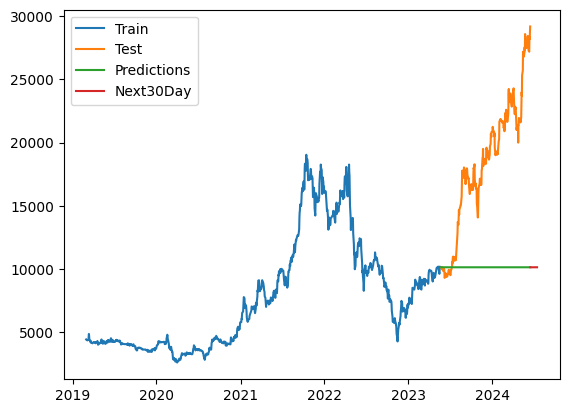

In [25]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [26]:
test_data.index

DatetimeIndex(['2023-05-24', '2023-05-25', '2023-05-26', '2023-05-29',
               '2023-05-30', '2023-05-31', '2023-06-01', '2023-06-02',
               '2023-06-05', '2023-06-06',
               ...
               '2024-06-03', '2024-06-04', '2024-06-05', '2024-06-06',
               '2024-06-07', '2024-06-10', '2024-06-11', '2024-06-12',
               '2024-06-13', '2024-06-14'],
              dtype='datetime64[ns]', name='time', length=265, freq=None)

In [27]:
# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Tính toán RMSE, MAPE và MDA
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mda = calculate_mda(y_test, y_pred)

# Tính MSLE
test_msle = np.mean((np.log1p(y_pred) - np.log1p(y_test)) ** 2)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MDA:', test_mda)
print('Testing MSLE:', test_msle)

Testing RMSE: 9711.987740196098
Testing MAPE: 40.018607519805336
Testing MDA: 9.848484848484848
Testing MSLE: 0.3969350151102394


# Split data 9 : 1

In [28]:
import pandas as pd

# Load data from CSV file
data = pd.read_csv('../ELC.csv')
data

,time,open,high,low,close,volume
0,2019-03-01,4347.826172,4527.950195,4347.826172,4409.937988,7790.0
1,2019-03-04,4409.937988,4527.950195,4322.981445,4347.826172,25064.0
2,2019-03-05,4409.937988,4409.937988,4335.403809,4347.826172,58956.0
3,2019-03-06,4347.826172,4372.670898,4347.826172,4347.826172,8434.0
4,2019-03-07,4366.459473,4440.993652,4335.403809,4335.403809,82027.0
...,...,...,...,...,...,...
1316,2024-06-10,27750.000000,27750.000000,27100.000000,27200.000000,1661200.0
1317,2024-06-11,27250.000000,28350.000000,27250.000000,28350.000000,2570200.0
1318,2024-06-12,28350.000000,28750.000000,27850.000000,28200.000000,1509300.0
1319,2024-06-13,28400.000000,29000.000000,27900.000000,28700.000000,3856900.0


In [29]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [30]:
# 2. Đọc file dữ liệu chứng khoán FPT và chia train test validate theo tỉ lệ 9:1
df = data
df['time'] = pd.to_datetime(df['time'])
df = df[['close', 'time']]
df = df.dropna() # Drop missing values
df.set_index('time', inplace=True)
#df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
# Split the data into training and testing sets
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [31]:
pip install pmdarima

In [32]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16778.228, Time=1.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16846.460, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16784.734, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16779.008, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16846.485, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16782.587, Time=1.87 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16779.293, Time=1.06 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=16764.793, Time=4.42 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16780.046, Time=0.58 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=16766.385, Time=7.51 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=16766.736, Time=9.84 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=16765.230, Time=4.48 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=16781.574, Time=1.23 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.95 sec
 ARIMA(3,1,2)(0,0,0)[0]  

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [33]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(n_periods=len(y_test))

In [34]:
import datetime

In [35]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]
next_30_days = [last_index + datetime.timedelta(days=i+1) for i in range(30)]
last_data = pd.Index(next_30_days)
x_next_30_days =  np.array(next_30_days).reshape(-1, 1)
# Predict the closing prices for the next 30 days

y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[18857.31715753 18824.20525842 18719.85342748 18729.07796953
 18831.48539634 18852.57846445 18762.42819525 18716.70382004
 18788.32311732 18851.89427523 18802.82900754 18728.96097483
 18753.86262336 18830.46739604 18829.07016346 18756.64705453
 18737.1478412  18799.63428073 18835.92413738 18787.6051361
 18739.60062444 18771.23327224 18825.45626039 18811.29869271
 18756.25123805 18753.74231078 18804.77531106 18821.79992283
 18778.71269244 18750.32430135]


In [36]:
# 7. Đánh giá độ chính xác validate, test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)


Testing RMSE: 4731.463950932035


Testing RMSE: 4731.463950932035


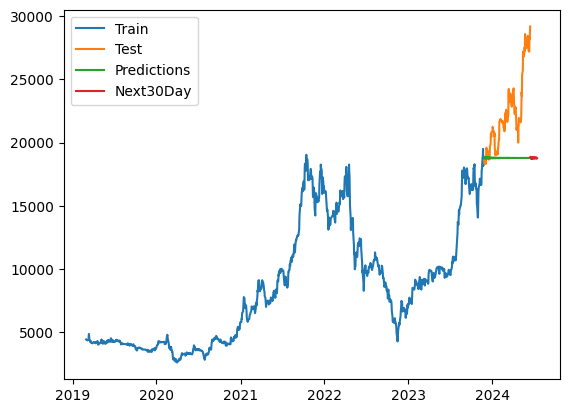

In [37]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [38]:
test_data.index

DatetimeIndex(['2023-11-28', '2023-11-29', '2023-11-30', '2023-12-01',
               '2023-12-04', '2023-12-05', '2023-12-06', '2023-12-07',
               '2023-12-08', '2023-12-11',
               ...
               '2024-06-03', '2024-06-04', '2024-06-05', '2024-06-06',
               '2024-06-07', '2024-06-10', '2024-06-11', '2024-06-12',
               '2024-06-13', '2024-06-14'],
              dtype='datetime64[ns]', name='time', length=133, freq=None)

In [39]:
# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Tính toán RMSE, MAPE và MDA
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mda = calculate_mda(y_test, y_pred)

# Tính MSLE
test_msle = np.mean((np.log1p(y_pred) - np.log1p(y_test)) ** 2)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MDA:', test_mda)
print('Testing MSLE:', test_msle)

Testing RMSE: 4731.463950932035
Testing MAPE: 15.22137781496393
Testing MDA: 41.66666666666667
Testing MSLE: 0.04555024139441297
